In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

# Manual FE

In [60]:
pd.set_option('display.max_columns', None)

bur=pd.read_csv('data/bureau.csv')
bur.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.00,-153.00,NaN,0,91323.00,0.00,NaN,0.00,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.00,NaN,NaN,0,225000.00,171342.00,NaN,0.00,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.00,NaN,NaN,0,464323.50,NaN,NaN,0.00,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.00,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.00,NaN,77674.50,0,2700000.00,NaN,NaN,0.00,Consumer credit,-21,NaN


In [61]:
# desc=pd.read_csv('data/HomeCredit_columns_description.csv',encoding = "ISO-8859-1").to_excel('data/HomeCredit_columns_description.xlsx')

In [62]:
pd.options.display.float_format = '{:.2f}'.format
bur.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.00,278214.93,102938.56,100001.00,188866.75,278055.00,367426.00,456255.00
SK_ID_BUREAU,1716428.00,5924434.49,532265.73,5000000.00,5463953.75,5926303.50,6385681.25,6843457.00
DAYS_CREDIT,1716428.00,-1142.11,795.16,-2922.00,-1666.00,-987.00,-474.00,0.00
CREDIT_DAY_OVERDUE,1716428.00,0.82,36.54,0.00,0.00,0.00,0.00,2792.00
DAYS_CREDIT_ENDDATE,1610875.00,510.52,4994.22,-42060.00,-1138.00,-330.00,474.00,31199.00
DAYS_ENDDATE_FACT,1082775.00,-1017.44,714.01,-42023.00,-1489.00,-897.00,-425.00,0.00
AMT_CREDIT_MAX_OVERDUE,591940.00,3825.42,206031.61,0.00,0.00,0.00,0.00,115987185.00
CNT_CREDIT_PROLONG,1716428.00,0.01,0.10,0.00,0.00,0.00,0.00,9.00
AMT_CREDIT_SUM,1716415.00,354994.59,1149811.34,0.00,51300.00,125518.50,315000.00,585000000.00
AMT_CREDIT_SUM_DEBT,1458759.00,137085.12,677401.13,-4705600.32,0.00,0.00,40153.50,170100000.00


* **DAYS_CREDIT_ENDDATE -115 and 85 years???**
* AMT_CREDIT_SUM_DEBT 585000000??
* AMT_CREDIT_MAX_OVERDUE 115987185.00
* AMT_CREDIT_SUM_DEBT 170100000.00
* AMT_CREDIT_SUM_LIMIT 4705600.32
* AMT_CREDIT_SUM_OVERDUE 3756681.00
* **AMT_ANNUITY 118453423.50???**


In [63]:
credit_count=bur.groupby('SK_ID_CURR')['SK_ID_BUREAU'].agg('count').to_frame().reset_index()
credit_count.rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'}, inplace=True)
credit_count.head(10)

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
5,100007,1
6,100008,3
7,100009,18
8,100010,2
9,100011,4


In [64]:
train=pd.read_csv('data/application_train.csv')
print(train.shape)

train=train.merge(credit_count, on='SK_ID_CURR', how='left')
train['previous_loan_counts'].fillna(0, inplace=True)
train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,8.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,4.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,

In [65]:
train['TARGET'].corr(train['AMT_ANNUITY'])

-0.012816561515413587

The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 4.6131
Median value for loan that was repaid = 4.7785


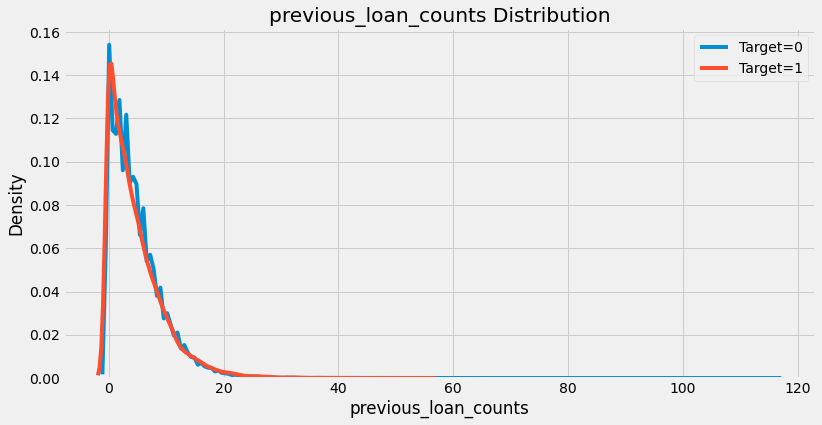

In [66]:
def kde_target(col, df):
    corr=df['TARGET'].corr(df[col])

    plt.figure(figsize=(12, 6))
    sns.kdeplot(df.loc[df['TARGET']==0, col], label='Target=0')
    sns.kdeplot(df.loc[df['TARGET']==1, col], label='Target=1')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('%s Distribution' % col)
    plt.legend()
    print('The correlation between %s and the TARGET is %0.4f' % (col, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % np.mean(df.loc[df['TARGET']==1, col]))
    print('Median value for loan that was repaid = %0.4f' % np.mean(df.loc[df['TARGET']==0, col]))

kde_target('previous_loan_counts', train)

In [67]:
bur_agg=bur.drop('SK_ID_BUREAU', axis=1).groupby('SK_ID_CURR').agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bur_agg.head()

SK_ID_CURR DAYS_CREDIT                           CREDIT_DAY_OVERDUE       \
                   count     mean  max   min   sum              count mean   
0     100001           7  -735.00  -49 -1572 -5145                  7 0.00   
1     100002           8  -874.00 -103 -1437 -6992                  8 0.00   
2     100003           4 -1400.75 -606 -2586 -5603                  4 0.00   
3     100004           2  -867.00 -408 -1326 -1734                  2 0.00   
4     100005           3  -190.67  -62  -373  -572                  3 0.00   

              DAYS_CREDIT_ENDDATE                                    \
  max min sum               count    mean     max      min      sum   
0   0   0   0                   7   82.43 1778.00 -1329.00   577.00   
1   0   0   0                   6 -349.00  780.00 -1072.00 -2094.00   
2   0   0   0                   4 -544.50 1216.00 -2434.00 -2178.00   
3   0   0   0                   2 -488.50 -382.00  -595.00  -977.00   
4   0   0   0                   3  439.33 1324.00  -128.00  1318.00   

  DAYS_ENDDATE_FACT                                    AMT_CREDIT_MAX_OVERDUE  \
              count     mean     max      min      sum                  count   
0                 4  -825.50 -544.00 -1328.00 -3302.00                      0   
1                 6  -697.50  -36.00 -1185.00 -4185.00                      5   
2                 3 -1097.33 -540.00 -2131.00 -3292.00                      4   
3                 2  -532.50 -382.00  -683.00 -1065.00                      1   
4                 1  -123.00 -123.00  -123.00  -123.00                      1   

                               CNT_CREDIT_PROLONG                   \
     mean     max  min     sum              count mean max min sum   
0     NaN     NaN  NaN    0.00                  7 0.00   0   0   0   
1 1681.03 5043.65 0.00 8405.15                  8 0.00   0   0   0   
2    0.00    0.00 0.00    0.00                  4 0.00   0   0   0   
3    0.00    0.00 0.00    0.00                  2 0.00   0   0   0   
4    0.00    0.00 0.00    0.00                  3 0.00   0   0   0   

  AMT_CREDIT_SUM                                         AMT_CREDIT_SUM_DEBT  \
           count      mean       max      min        sum               count   
0              7 207623.57 378000.00 85500.00 1453365.00                   7   
1              8 108131.95 450000.00     0.00  865055.56                   5   
2              4 254350.12 810000.00 22248.00 1017400.50                   4   
3              2  94518.90  94537.80 94500.00  189037.80                   2   
4              3 219042.00 568800.00 29826.00  657126.00                   3   

                                     AMT_CREDIT_SUM_LIMIT                      \
       mean       max  min       sum                count      mean       max   
0  85240.93 373239.00 0.00 596686.50                    6      0.00      0.00   
1  49156.20 245781.00 0.00 245781.00                    4   7997.14  31988.56   
2      0.00      0.00 0.00      0.00                    4 202500.00 810000.00   
3      0.00      0.00 0.00      0.00                    2      0.00      0.00   
4 189469.50 543087.00 0.00 568408.50                    3      0.00      0.00   

                 AMT_CREDIT_SUM_OVERDUE                      \
   min       sum                  count mean  max  min  sum   
0 0.00      0.00                      7 0.00 0.00 0.00 0.00   
1 0.00  31988.56                      8 0.00 0.00 0.00 0.00   
2 0.00 810000.00                      4 0.00 0.00 0.00 0.00   
3 0.00      0.00                      2 0.00 0.00 0.00 0.00   
4 0.00      0.00                      3 0.00 0.00 0.00 0.00   

  DAYS_CREDIT_UPDATE                          AMT_ANNUITY                   \
               count    mean  max   min   sum       count    mean      max   
0                  7  -93.14   -6  -155  -652           7 3545.36 10822.50   
1                  8 -499.88   -7 -1185 -3999           7    0.00     0.00   
2              

In [68]:
columns=['SK_ID_CURR']

for i in bur_agg.columns.levels[0]:
    if i!='SK_ID_CURR':
        for j in bur_agg.columns.levels[1][:-1]:
            columns.append('bureau_'+i+'_'+j)

In [69]:
bur_agg.columns=columns
bur_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.00,-49,-1572,-5145,7,0.00,0,0,0,7,82.43,1778.00,-1329.00,577.00,4,-825.50,-544.00,-1328.00,-3302.00,0,NaN,NaN,NaN,0.00,7,0.00,0,0,0,7,207623.57,378000.00,85500.00,1453365.00,7,85240.93,373239.00,0.00,596686.50,6,0.00,0.00,0.00,0.00,7,0.00,0.00,0.00,0.00,7,-93.14,-6,-155,-652,7,3545.36,10822.50,0.00,24817.50
1,100002,8,-874.00,-103,-1437,-6992,8,0.00,0,0,0,6,-349.00,780.00,-1072.00,-2094.00,6,-697.50,-36.00,-1185.00,-4185.00,5,1681.03,5043.65,0.00,8405.15,8,0.00,0,0,0,8,108131.95,450000.00,0.00,865055.56,5,49156.20,245781.00,0.00,245781.00,4,7997.14,31988.56,0.00,31988.56,8,0.00,0.00,0.00,0.00,8,-499.88,-7,-1185,-3999,7,0.00,0.00,0.00,0.00
2,100003,4,-1400.75,-606,-2586,-5603,4,0.00,0,0,0,4,-544.50,1216.00,-2434.00,-2178.00,3,-1097.33,-540.00,-2131.00,-3292.00,4,0.00,0.00,0.00,0.00,4,0.00,0,0,0,4,254350.12,810000.00,22248.00,1017400.50,4,0.00,0.00,0.00,0.00,4,202500.00,810000.00,0.00,810000.00,4,0.00,0.00,0.00,0.00,4,-816.00,-43,-2131,-3264,0,NaN,NaN,NaN,0.00
3,100004,2,-867.00,-408,-1326,-1734,2,0.00,0,0,0,2,-488.50,-382.00,-595.00,-977.00,2,-532.50,-382.00,-683.00,-1065.00,1,0.00,0.00,0.00,0.00,2,0.00,0,0,0,2,94518.90,94537.80,94500.00,189037.80,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,-532.00,-382,-682,-1064,0,NaN,NaN,NaN,0.00
4,100005,3,-190.67,-62,-373,-572,3,0.00,0,0,0,3,439.33,1324.00,-128.00,1318.00,1,-123.00,-123.00,-123.00,-123.00,1,0.00,0.00,0.00,0.00,3,0.00,0,0,0,3,219042.00,568800.00,29826.00,657126.00,3,189469.50,543087.00,0.00,568408.50,3,0.00,0.00,0.00,0.00,3,0.00,0.00,0.00,0.00,3,-54.33,-11,-121,-163,3,1420.50,4261.50,0.00,4261.50


In [70]:
train=train.merge(bur_agg, on='SK_ID_CURR', how='left')
print(bur_agg.shape)
train.head()

(305811, 61)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min

In [71]:
new_corrs = []

for c in bur_agg.columns:
    new_corrs.append((c, train['TARGET'].corr(train[c])))

new_corrs=sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.089728967219981),
 ('bureau_DAYS_CREDIT_min', 0.07524825103010374),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968684),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.055887379843920795),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.053734895601020585),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758622),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997309),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.048853502611115936),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483553),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.04286392247073023),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484667),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.0414036353530601),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.03658963469632898),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921615996),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.03049230665332547)]

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -908.4120
Median value for loan that was repaid = -1097.6774


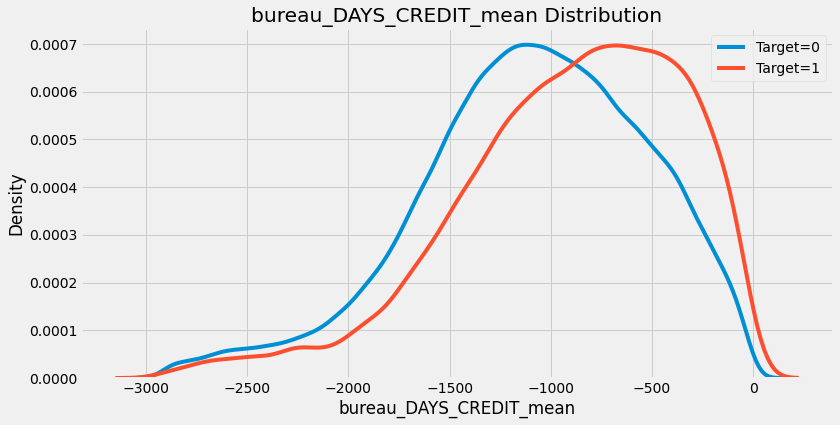

In [72]:
kde_target('bureau_DAYS_CREDIT_mean', train)

In [73]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [74]:
agg_num=agg_numeric(bur.drop('SK_ID_BUREAU', axis=1), group_var='SK_ID_CURR', df_name='bureau')
agg_num.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.00,-49,-1572,-5145,7,0.00,0,0,0,7,82.43,1778.00,-1329.00,577.00,4,-825.50,-544.00,-1328.00,-3302.00,0,NaN,NaN,NaN,0.00,7,0.00,0,0,0,7,207623.57,378000.00,85500.00,1453365.00,7,85240.93,373239.00,0.00,596686.50,6,0.00,0.00,0.00,0.00,7,0.00,0.00,0.00,0.00,7,-93.14,-6,-155,-652,7,3545.36,10822.50,0.00,24817.50
1,100002,8,-874.00,-103,-1437,-6992,8,0.00,0,0,0,6,-349.00,780.00,-1072.00,-2094.00,6,-697.50,-36.00,-1185.00,-4185.00,5,1681.03,5043.65,0.00,8405.15,8,0.00,0,0,0,8,108131.95,450000.00,0.00,865055.56,5,49156.20,245781.00,0.00,245781.00,4,7997.14,31988.56,0.00,31988.56,8,0.00,0.00,0.00,0.00,8,-499.88,-7,-1185,-3999,7,0.00,0.00,0.00,0.00
2,100003,4,-1400.75,-606,-2586,-5603,4,0.00,0,0,0,4,-544.50,1216.00,-2434.00,-2178.00,3,-1097.33,-540.00,-2131.00,-3292.00,4,0.00,0.00,0.00,0.00,4,0.00,0,0,0,4,254350.12,810000.00,22248.00,1017400.50,4,0.00,0.00,0.00,0.00,4,202500.00,810000.00,0.00,810000.00,4,0.00,0.00,0.00,0.00,4,-816.00,-43,-2131,-3264,0,NaN,NaN,NaN,0.00
3,100004,2,-867.00,-408,-1326,-1734,2,0.00,0,0,0,2,-488.50,-382.00,-595.00,-977.00,2,-532.50,-382.00,-683.00,-1065.00,1,0.00,0.00,0.00,0.00,2,0.00,0,0,0,2,94518.90,94537.80,94500.00,189037.80,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,-532.00,-382,-682,-1064,0,NaN,NaN,NaN,0.00
4,100005,3,-190.67,-62,-373,-572,3,0.00,0,0,0,3,439.33,1324.00,-128.00,1318.00,1,-123.00,-123.00,-123.00,-123.00,1,0.00,0.00,0.00,0.00,3,0.00,0,0,0,3,219042.00,568800.00,29826.00,657126.00,3,189469.50,543087.00,0.00,568408.50,3,0.00,0.00,0.00,0.00,3,0.00,0.00,0.00,0.00,3,-54.33,-11,-121,-163,3,1420.50,4261.50,0.00,4261.50


In [75]:
def target_corrs(df):
    new_corrs = []
    for c in df.columns:
        print(c)
        if c != 'TARGET':
            new_corrs.append((c, df['TARGET'].corr(df[c])))

    new_corrs=sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
    return new_corrs

In [76]:
# stopped on Categorical Variables